In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# MNIST Data Pre-processing
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils  # utilities for one-hot encoding of ground truth values

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10).astype(np.float32)
y_test = np_utils.to_categorical(y_test, 10).astype(np.float32)

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from Model import GAN

Gan, G, D, F = GAN([28,28,1], 'B', 0.001, 2, 1)

epochs=500
batch_size=128

target=0

x_train_selected = x_train
y_train_selected = y_train

for cur_epoch in range(epochs):
    for discrm_epoch in range(4):
        input_batch = x_train_selected[np.random.randint(0, x_train_selected.shape[0], size=int(batch_size)),]
        y_discrim = np.ones([batch_size,1])
        if discrm_epoch % 2 == 0:
            input_batch = np.add(input_batch, G.predict(input_batch))
            y_discrim = np.zeros([batch_size,1])
        D.train_on_batch(input_batch, y_discrim)
        
    input_idx = np.random.randint(0, x_train_selected.shape[0], size=int(batch_size))
    input_batch = x_train_selected[input_idx,]
    y_discrim = np.ones([batch_size,1])
    #y_class = y_train_selected[input_idx,]
    y_class=np_utils.to_categorical(np.ones(batch_size)*target, 10).astype(np.float32)
    y_hinge=np.zeros([batch_size,28,28,1])
    scalarloss=Gan.train_on_batch(input_batch, [y_discrim, y_class, y_hinge])
    print("Epoch number:",cur_epoch,"; Loss",scalarloss)

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch number: 0 ; Loss [2.490449, 0.55912757, 0.77419984, 0.38292181]
Epoch number: 1 ; Loss [2.293245, 0.5143149, 0.7141062, 0.3507177]
Epoch number: 2 ; Loss [2.301629, 0.4550304, 0.76174116, 0.32311618]
Epoch number: 3 ; Loss [2.2475, 0.5003956, 0.7253176, 0.2964692]
Epoch number: 4 ; Loss [2.3601372, 0.59858245, 0.7432306, 0.27509362]
Epoch number: 5 ; Loss [2.4952445, 0.6631167, 0.78716123, 0.25780526]
Epoch number: 6 ; Loss [2.360137, 0.7010923, 0.704134, 0.25077686]
Epoch number: 7 ; Loss [2.536284, 0.75554913, 0.76780677, 0.24512136]
Epoch number: 8 ; Loss [2.4822533, 0.8436012, 0.69569045, 0.2472714]
Epoch number: 9 ; Loss [2.4512556, 0.88225085, 0.6576052, 0.25379437]
Epoch number: 10 ; Loss [2.529103, 0.89914775, 0.6882293, 0.2534967]
Epoch number: 11 ; Loss [2.5326746, 0.8993117, 0.6785375, 0.2762878]
Epoch number: 12 ; Loss [2.6575694, 0.9263474, 0.70653206, 0.31815785]
Epoch number: 13 ; Loss [2.6467855, 0.9360691, 0.684031, 0.34265453]
Epoch number: 14 ; Loss [2.6215968,

Epoch number: 116 ; Loss [1.0481993, 0.96713924, 0.0, 0.08106002]
Epoch number: 117 ; Loss [1.0368416, 0.95800793, 0.0, 0.078833655]
Epoch number: 118 ; Loss [1.0536437, 0.978274, 0.001684847, 0.07200001]
Epoch number: 119 ; Loss [1.0830606, 0.9887633, 0.013657755, 0.06698175]
Epoch number: 120 ; Loss [1.0736153, 0.98388565, 0.009767968, 0.070193715]
Epoch number: 121 ; Loss [1.0575693, 0.98651016, 0.0002558576, 0.07054746]
Epoch number: 122 ; Loss [1.044982, 0.9663376, 0.0038552978, 0.070933804]
Epoch number: 123 ; Loss [1.0477921, 0.96982515, 0.0027924937, 0.0723819]
Epoch number: 124 ; Loss [1.0723214, 0.98287785, 0.013391941, 0.06265975]
Epoch number: 125 ; Loss [1.0778716, 0.9891074, 0.011837782, 0.06508863]
Epoch number: 126 ; Loss [1.066677, 0.98733544, 0.005424694, 0.068492085]
Epoch number: 127 ; Loss [1.065753, 0.9829499, 0.009918768, 0.06296547]
Epoch number: 128 ; Loss [1.081935, 0.9800158, 0.020410255, 0.0610987]
Epoch number: 129 ; Loss [1.046115, 0.984426, 0.0, 0.0616890

Epoch number: 232 ; Loss [1.1377726, 0.9828075, 0.05090542, 0.053154275]
Epoch number: 233 ; Loss [1.0403054, 0.96033967, 0.005272342, 0.06942108]
Epoch number: 234 ; Loss [1.081384, 0.9725934, 0.014306388, 0.08017777]
Epoch number: 235 ; Loss [1.0804218, 0.99685603, 0.0, 0.08356579]
Epoch number: 236 ; Loss [1.0760539, 0.99508023, 0.0, 0.08097357]
Epoch number: 237 ; Loss [1.0625534, 0.98533404, 0.0, 0.07721936]
Epoch number: 238 ; Loss [1.0602186, 0.9930389, 5.7012774e-05, 0.0670656]
Epoch number: 239 ; Loss [1.091467, 0.9854908, 0.026336193, 0.053303793]
Epoch number: 240 ; Loss [1.0729297, 0.97492677, 0.023489622, 0.05102376]
Epoch number: 241 ; Loss [1.0772536, 0.9865931, 0.020521894, 0.049616717]
Epoch number: 242 ; Loss [1.0720139, 0.99098283, 0.016967587, 0.047095858]
Epoch number: 243 ; Loss [1.0543549, 0.98323005, 0.010340417, 0.050444037]
Epoch number: 244 ; Loss [1.042677, 0.9819349, 0.002825873, 0.055090353]
Epoch number: 245 ; Loss [1.0467659, 0.9887042, 0.0, 0.058061775]

Epoch number: 348 ; Loss [1.0291309, 0.9887954, 0.002310376, 0.035714746]
Epoch number: 349 ; Loss [1.036499, 0.997492, 0.0, 0.03900698]
Epoch number: 350 ; Loss [1.0400208, 0.99787205, 0.0, 0.04214878]
Epoch number: 351 ; Loss [1.0406611, 0.9975533, 0.0, 0.043107793]
Epoch number: 352 ; Loss [1.0384482, 0.98781097, 0.005185809, 0.04026562]
Epoch number: 353 ; Loss [1.0276519, 0.9732716, 0.008527717, 0.037324898]
Epoch number: 354 ; Loss [1.0834806, 0.99473625, 0.026349874, 0.036044583]
Epoch number: 355 ; Loss [1.0360004, 0.9972455, 0.0, 0.038754936]
Epoch number: 356 ; Loss [1.0369953, 0.99142945, 0.0014779011, 0.042610087]
Epoch number: 357 ; Loss [1.0277282, 0.9866258, 0.0, 0.04110243]
Epoch number: 358 ; Loss [1.0403218, 0.99966764, 0.00054550683, 0.03956314]
Epoch number: 359 ; Loss [1.0328066, 0.9853142, 0.007321663, 0.03284917]
Epoch number: 360 ; Loss [1.0027409, 0.95835435, 0.0059008794, 0.03258476]
Epoch number: 361 ; Loss [1.0899363, 0.99816304, 0.03118904, 0.029395092]
Epo

Epoch number: 462 ; Loss [1.0638483, 0.99799985, 0.0020910227, 0.06166643]
Epoch number: 463 ; Loss [1.0114373, 0.9570236, 0.0, 0.054413624]
Epoch number: 464 ; Loss [1.020678, 0.96802425, 0.0045125596, 0.043628678]
Epoch number: 465 ; Loss [1.1065228, 0.9963489, 0.040956855, 0.028260194]
Epoch number: 466 ; Loss [0.98193616, 0.9071712, 0.020845512, 0.033073977]
Epoch number: 467 ; Loss [1.0200647, 0.97432864, 0.004679028, 0.036378067]
Epoch number: 468 ; Loss [0.966199, 0.91950834, 0.0031482792, 0.040394045]
Epoch number: 469 ; Loss [1.0337632, 0.948379, 0.020314995, 0.044754148]
Epoch number: 470 ; Loss [1.0385312, 0.9857732, 0.0007371311, 0.051283725]
Epoch number: 471 ; Loss [1.0809928, 0.9740486, 0.022336844, 0.062270533]
Epoch number: 472 ; Loss [1.0555539, 0.9545191, 0.018289708, 0.06445534]
Epoch number: 473 ; Loss [1.0742671, 0.99162036, 0.0066418955, 0.06936297]
Epoch number: 474 ; Loss [1.0535065, 0.98194414, 0.0, 0.07156238]
Epoch number: 475 ; Loss [0.9807242, 0.9145029, 0

In [25]:
import matplotlib.pyplot as plt
import pickle

idx = range(x_train.shape[0])
#idx = np.random.randint(0, x_train_selected.shape[0], size=int(1000))
real = x_train[idx,]
fake = real + G.predict(real)
pdt = np.argmax(Gan.predict(real)[1], axis=1)
label = np.argmax(y_train[idx,], axis=1)
idx = np.logical_and(pdt != label, pdt == 0)
real = real[idx,]
fake = fake[idx,]
pdt = pdt[idx,]
label = label[idx,]
idx = np.argsort(np.mean((real-fake)**2, axis=(1,2,3)))
real = real[idx,]
fake = fake[idx,]
pdt = pdt[idx,]
label = label[idx,]


record = {
    'label': label,
    'target': pdt,
    'clean': real,
    'adv': fake,
}



with open('WB-B-t0.pickle', 'wb') as handle:
    pickle.dump(record, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
print(label.shape)
print(pdt.shape)
print(real.shape)
print(fake.shape)

(50789,)
(50789,)
(50789, 28, 28, 1)
(50789, 28, 28, 1)


In [30]:
np.save('WB-B-t0-label.npy', label)
np.save('WB-B-t0-target.npy', pdt)
np.save('WB-B-t0-clean.npy', real)
np.save('WB-B-t0-adv.npy', fake)

In [27]:
unique, counts = np.unique(10*label+pdt, return_counts=True)
print(len(unique))
print(sum(counts))
print(dict(zip(unique, counts)))

9
50789
{80: 5757, 50: 4932, 20: 4744, 70: 6063, 40: 5776, 10: 6382, 60: 5710, 90: 5847, 30: 5578}


2
0


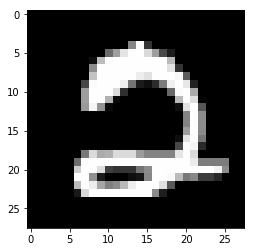

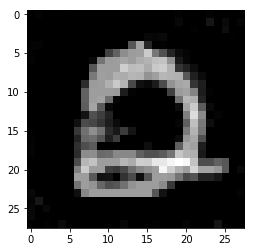

5
0


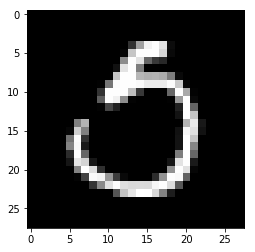

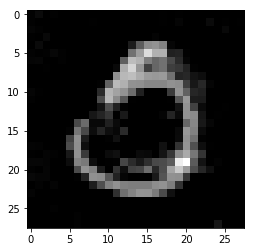

6
0


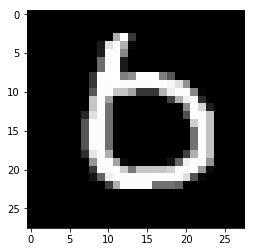

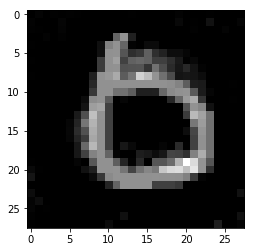

In [28]:
for k in range(3):
    print(label[k,])
    print(pdt[k,])
    plt.imshow((real[k,] * 255).astype(np.int).reshape(28,28), cmap='gray')
    plt.show()
    plt.imshow((fake[k,] * 255).astype(np.int).reshape(28,28), cmap='gray')
    plt.show()

5


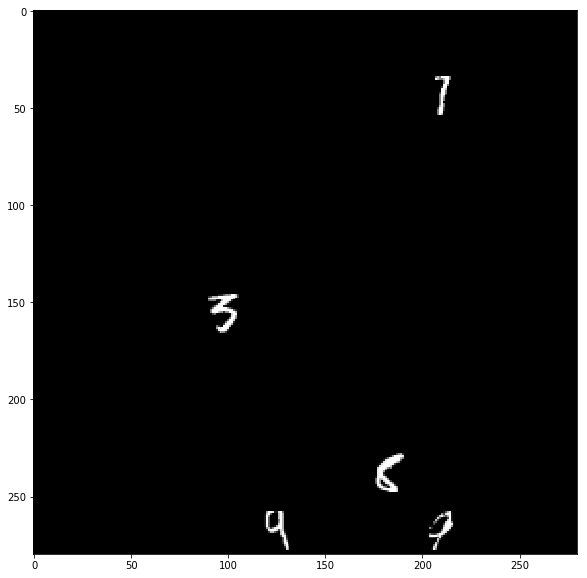

In [16]:
image = np.zeros((280,280,1))

c = {}

for i in range(10):
    for j in range(10):
        idx = np.logical_and(label==i, pdt==j)
        if (10*i+j) in d and (10*i+j) not in c:
            c[10*i+j] = fake[idx][0]
        image[28*i:28*(i+1),28*j:28*(j+1),:] = c[10*i+j] if (10*i+j) in c else np.zeros((28,28,1))
        
print(len(c.keys()))

plt.figure(figsize=(10,10))
plt.imshow(np.clip(image*255, 0, 255).astype(np.int).reshape(280,280), cmap='gray')
plt.show()

In [ ]:
with open('WB-C.pickle', 'rb') as handle:
    record = pickle.load(handle)

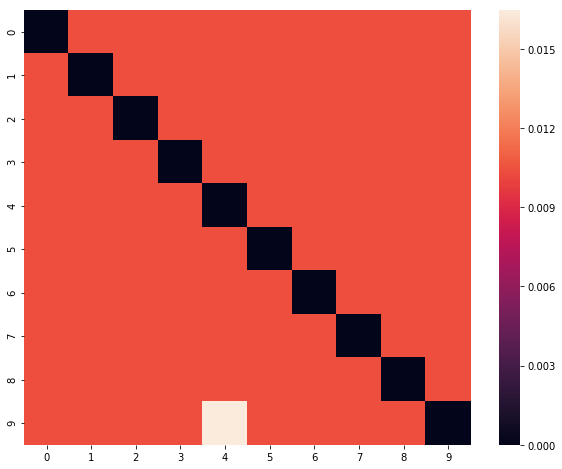

In [15]:
d = dict(zip(unique, counts))
n = np.zeros((10,10))
m = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        n[i,j] = d[10*i+j] if (10*i+j) in d else int(i!=j)
        idx = np.logical_and(label==i, pdt==j)
        m[i,j] = np.median(np.mean((real[idx,]-fake[idx,])**2, axis=(1,2,3))) if (10*i+j) in d else float(i!=j)*0.07

import seaborn
plt.figure(figsize=(10,8))
plt.xlabel('adasd')
n = np.log(n+1)*0.015
seaborn.heatmap(n)
#seaborn.heatmap(m)